In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df_X = df[df.columns[:-1]]
df_X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [4]:
df_y = df[['Transported']]
y = df_y.to_numpy().ravel()
df_y

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


## Discrete Attributes

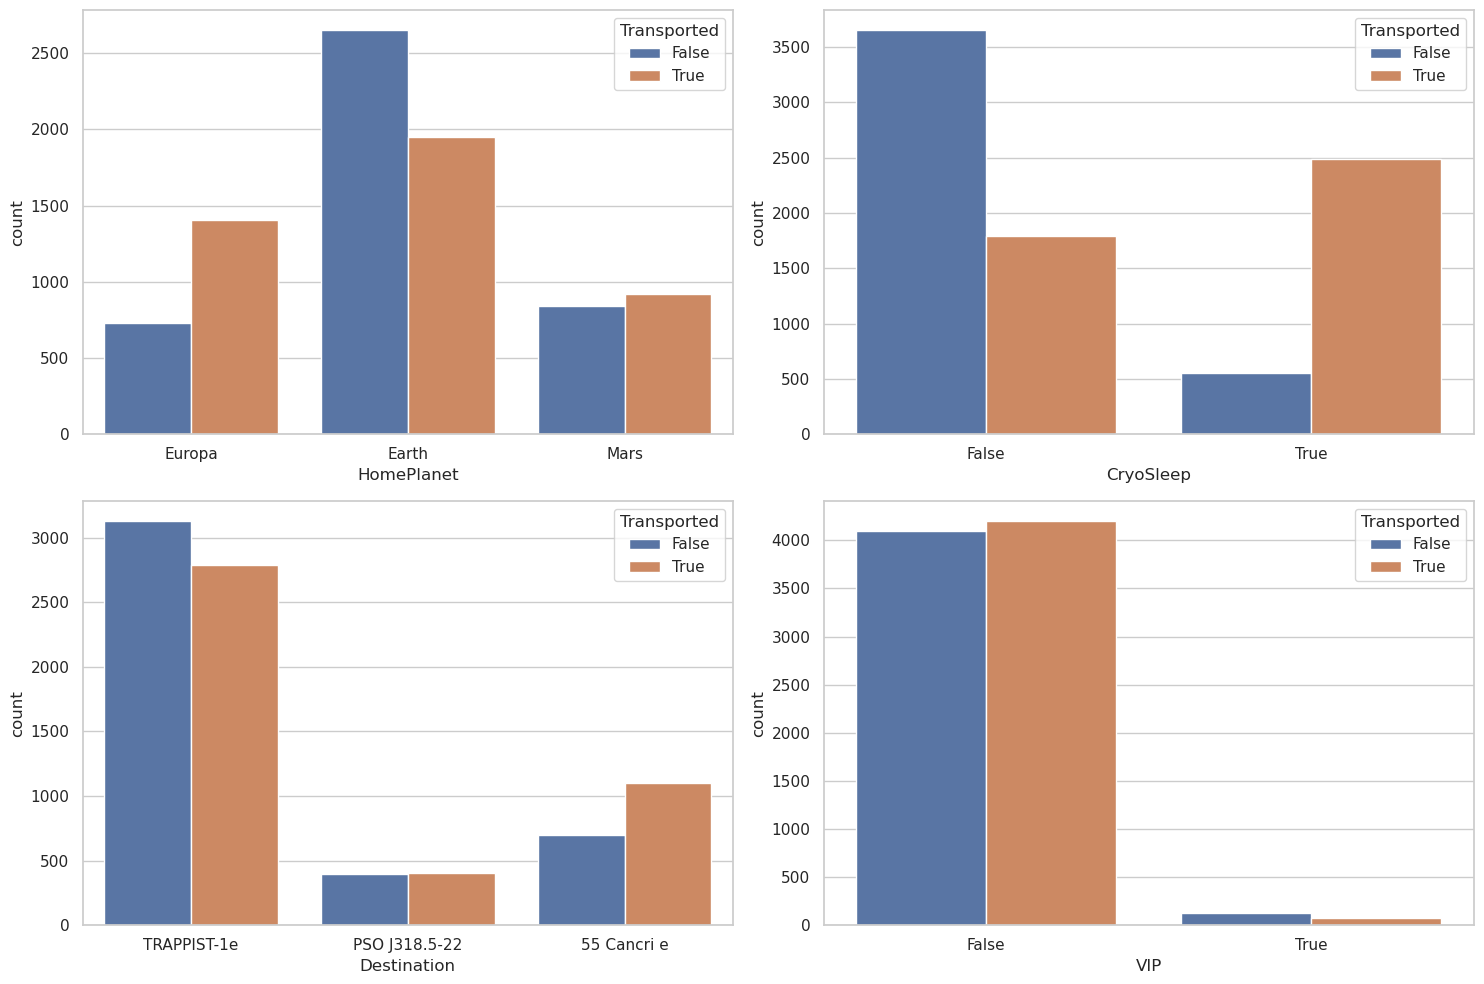

In [5]:
attributes = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(2, 2, figsize=(15, 5 * len(attributes) // 2))
axs = axs.flatten()
for ax, attr in zip(axs, attributes):
    sns.countplot(df, x=attr, hue='Transported', ax=ax)
    # pd.crosstab(df[attr], df['Transported']).plot(kind='bar', ax=ax)
fig.tight_layout()
plt.show()

## Continuous Attributes

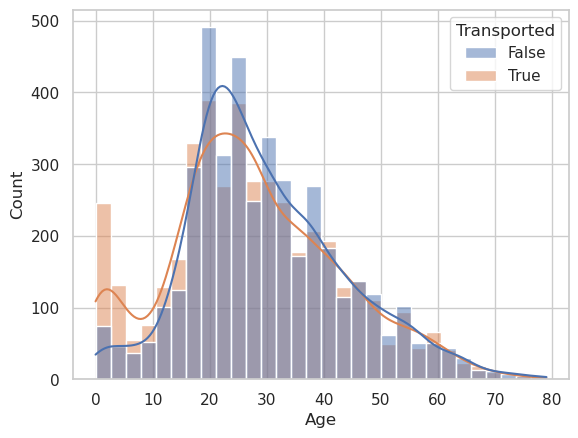

In [6]:
sns.histplot(df, x='Age', hue='Transported', kde=True, bins=30)
plt.show()

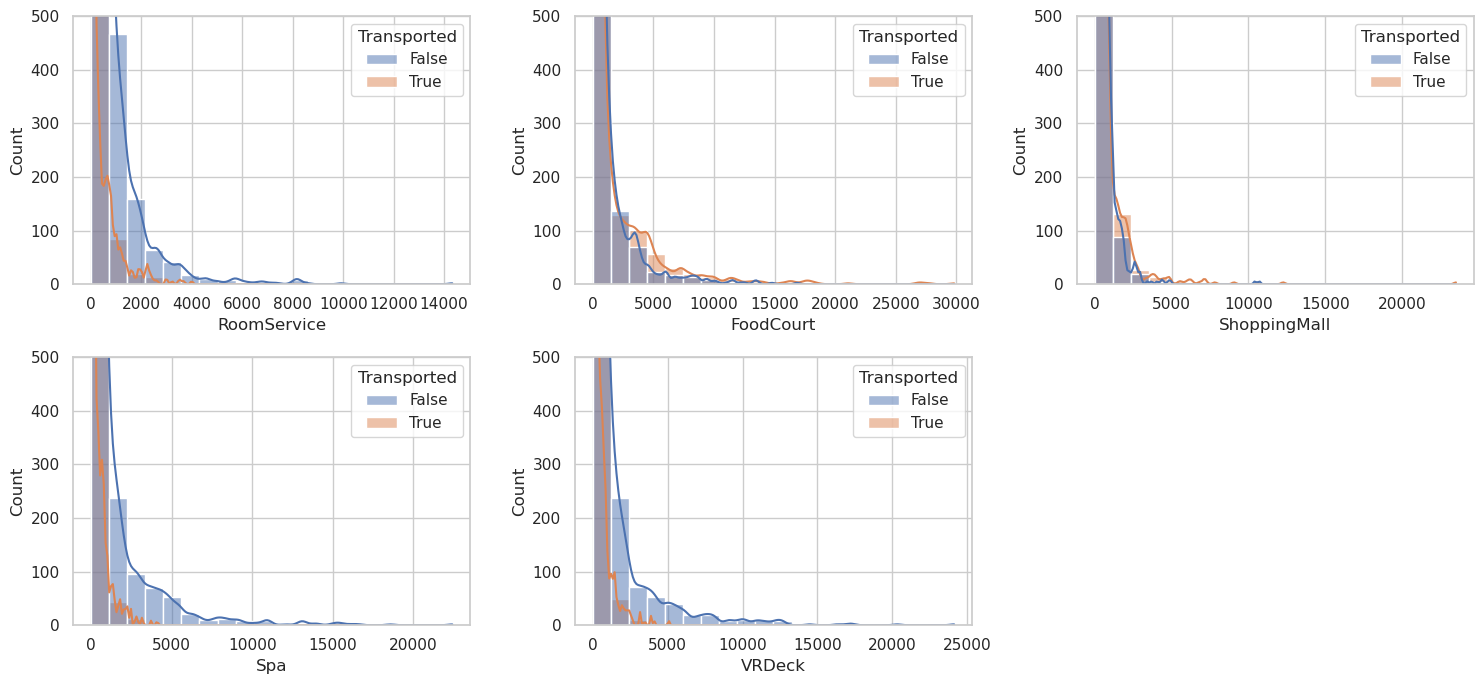

In [7]:
attributes = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axs = plt.subplots(2, 3, figsize=(15, 3 * len(attributes) // 2))
axs = axs.flatten()
for ax, attr in zip(axs, attributes):
    sns.histplot(df, x=attr, hue='Transported', kde=True, bins=20, ax=ax)
    ax.set_ylim((0, 500))
axs[-1].remove()
fig.tight_layout()
plt.show()

## Cabins

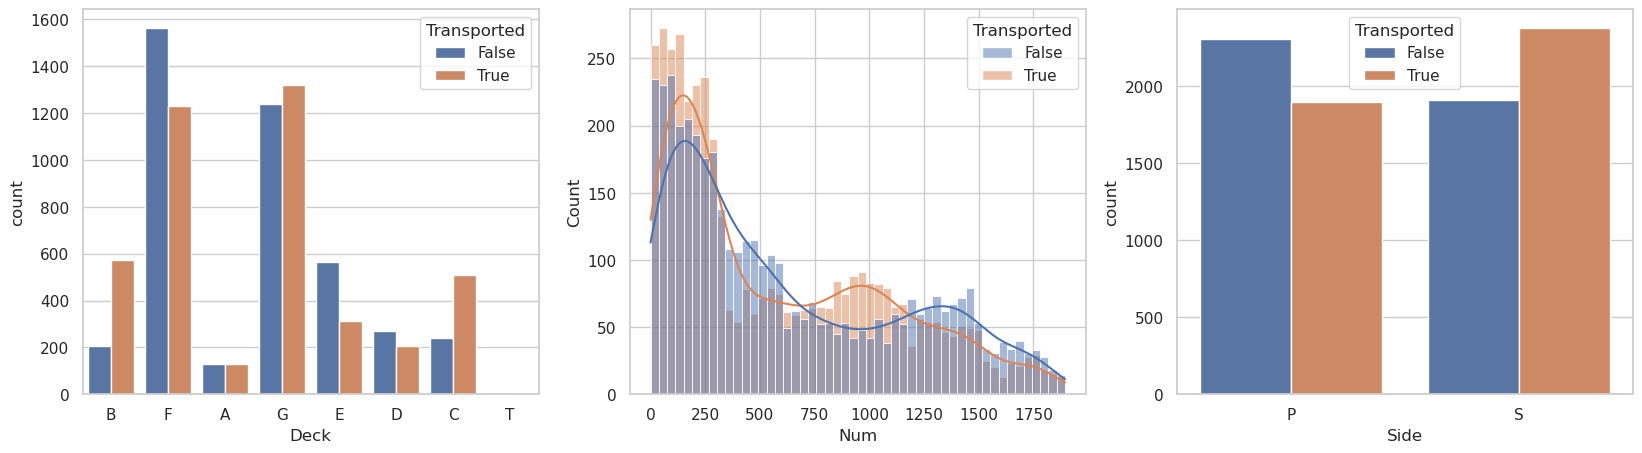

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs = axs.flatten()
df_cabins = df.copy()
df_cabins[['Deck', 'Num', 'Side']] = df['Cabin'].str.extract(r'(\w)/(\d+)/(\w)')
df_cabins['Num'] = pd.to_numeric(df_cabins['Num'])

sns.countplot(df_cabins, x='Deck', hue='Transported', ax=axs[0])

sns.histplot(df_cabins, x='Num', hue='Transported', kde=True, bins=50, ax=axs[1])

sns.countplot(df_cabins, x='Side', hue='Transported', ax=axs[2])

plt.show()

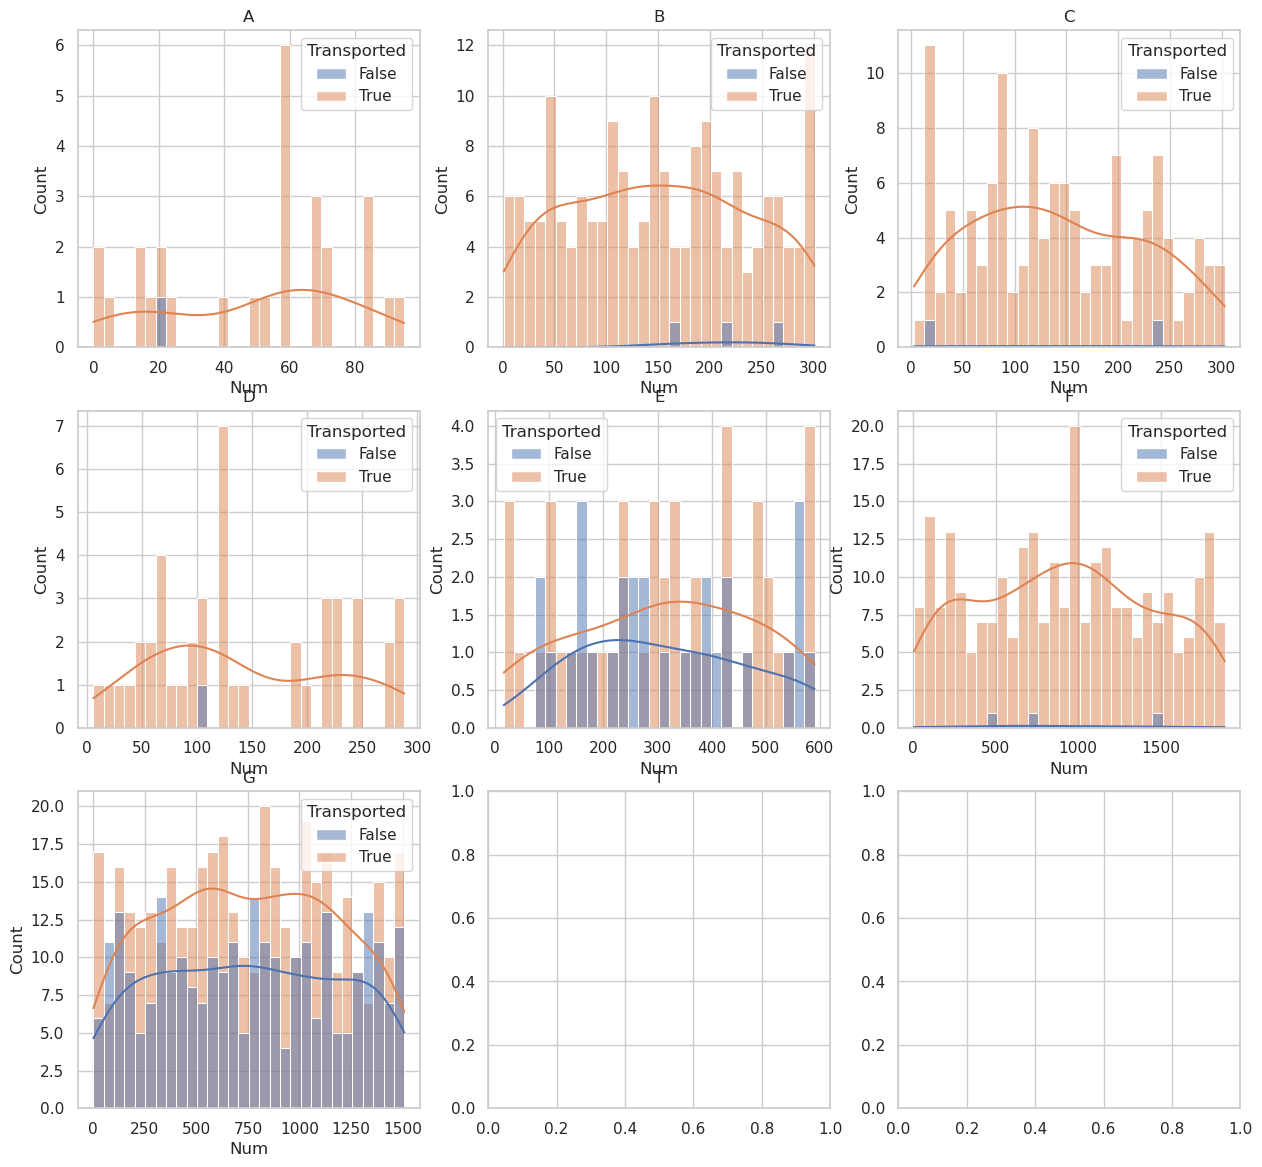

In [9]:
plt.show()
from math import ceil

values = df_cabins['Deck'].dropna().unique()
values.sort()
size = values.shape[0]

fig, axs = plt.subplots(3, ceil(size / 3), figsize=(15, ceil(5 * size / 3)))
axs = axs.flatten()

for ax, v in zip(axs, values):
    sns.histplot(df_cabins[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep']) & (df_cabins['Side'] == 'P')],
                 x='Num', hue='Transported', kde=True,
                 bins=30, ax=ax)
    ax.set_title(v)

plt.show()

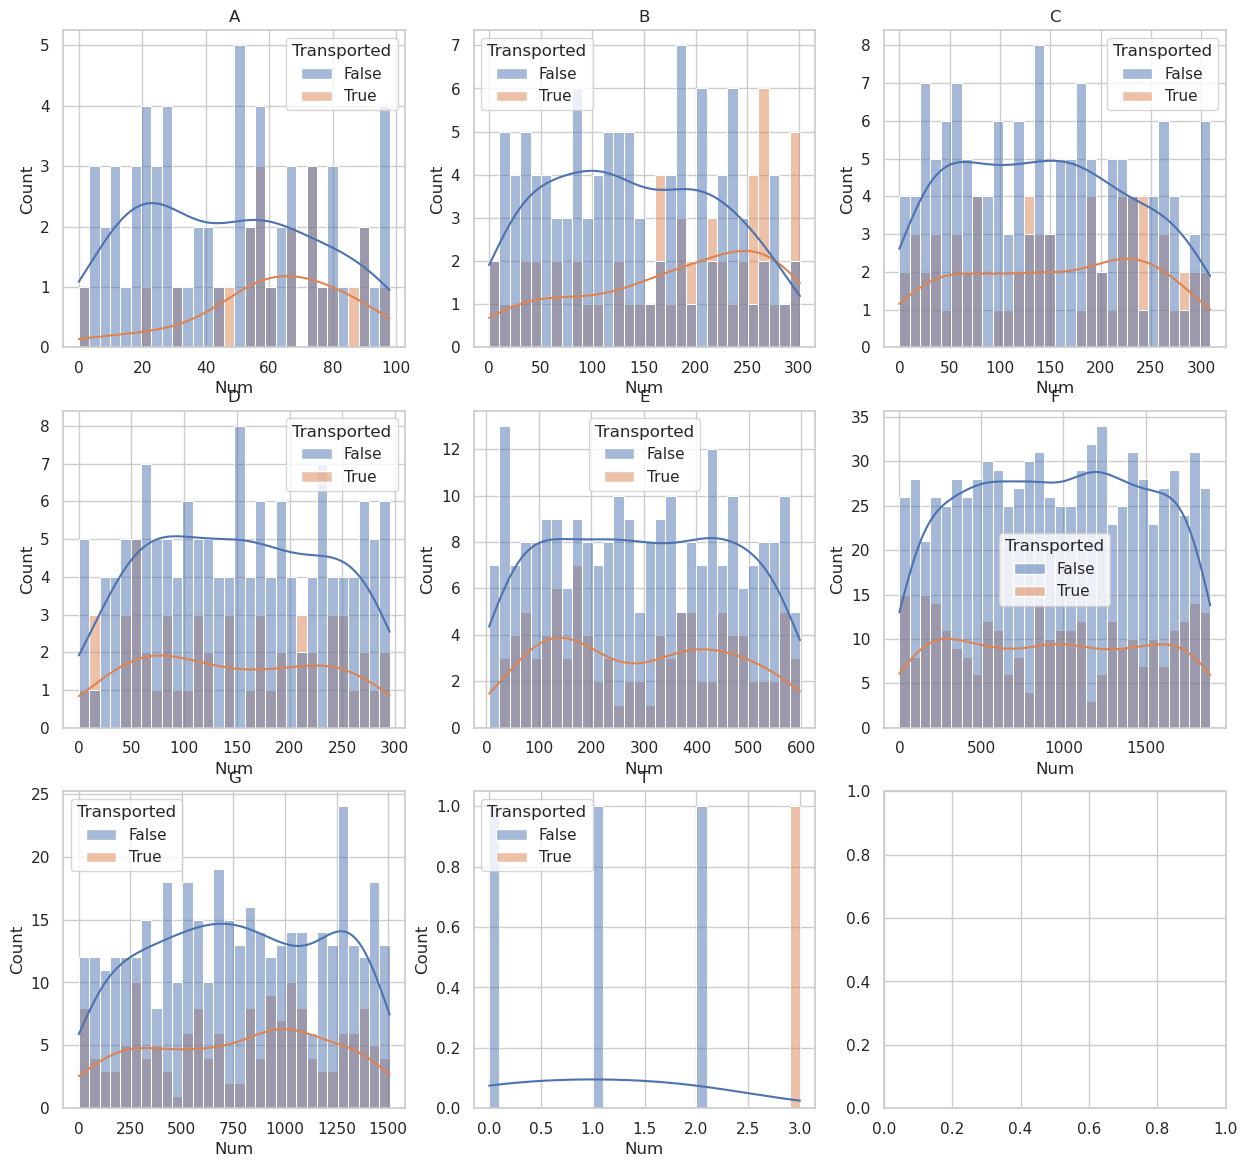

In [10]:
from math import ceil

values = df_cabins['Deck'].dropna().unique()
values.sort()
size = values.shape[0]

fig, axs = plt.subplots(3, ceil(size / 3), figsize=(15, ceil(5 * size / 3)))
axs = axs.flatten()

for ax, v in zip(axs, values):
    sns.histplot(df_cabins[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep'] == False) & (df_cabins['Side'] == 'P')], x='Num', hue='Transported', kde=True,
                 bins=30, ax=ax)
    ax.set_title(v)

plt.show()

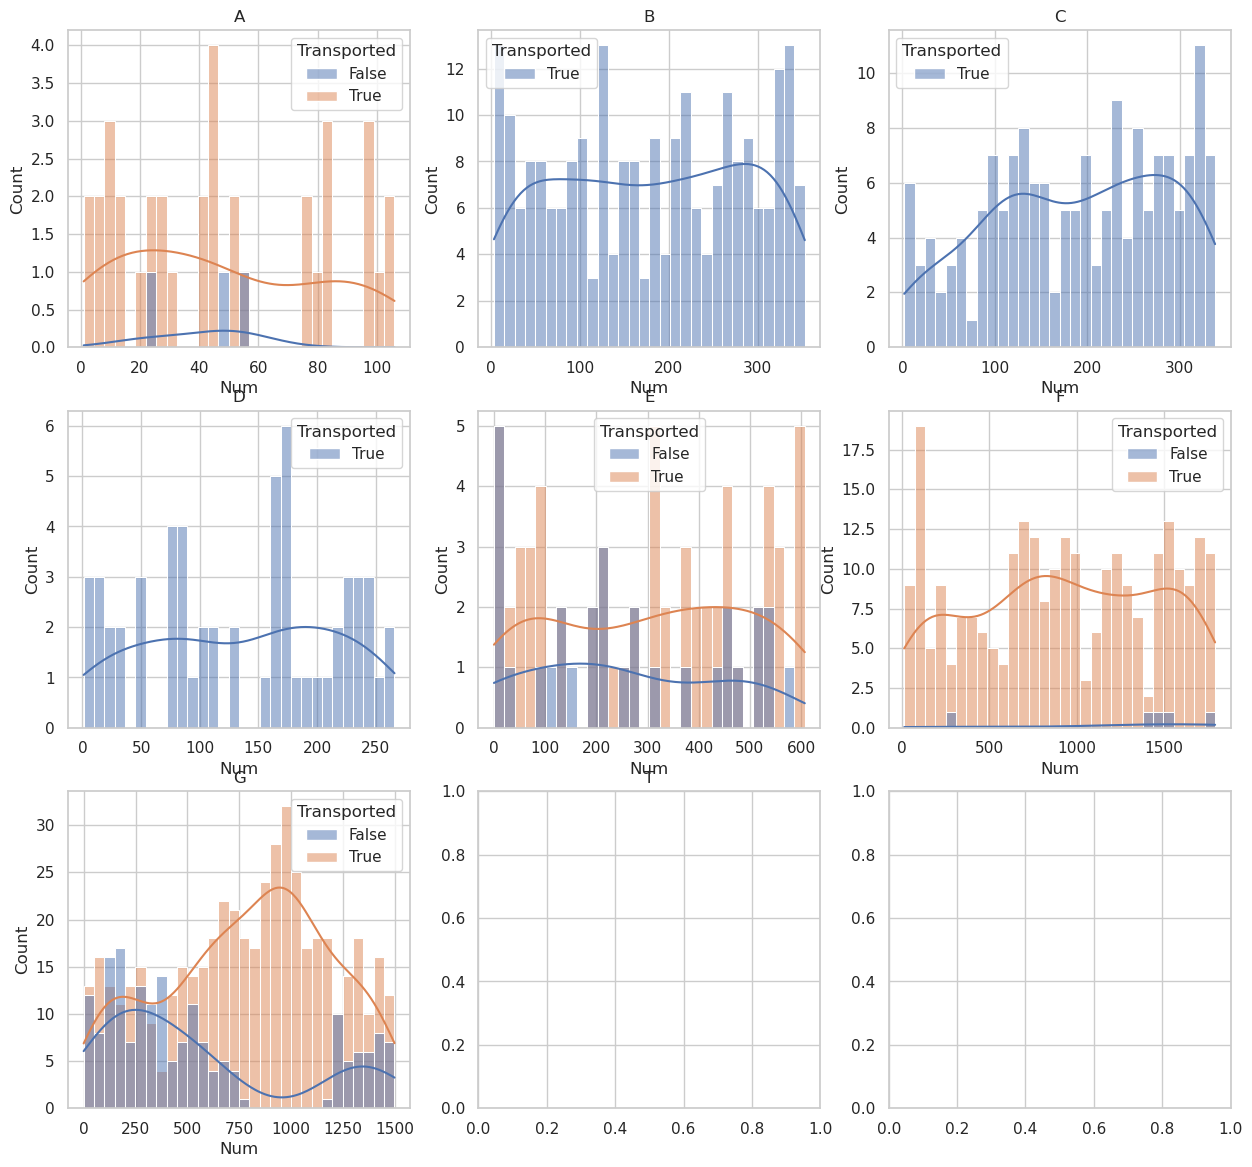

In [11]:
from math import ceil

values = df_cabins['Deck'].dropna().unique()
values.sort()
size = values.shape[0]

fig, axs = plt.subplots(3, ceil(size / 3), figsize=(15, ceil(5 * size / 3)))
axs = axs.flatten()

for ax, v in zip(axs, values):
    sns.histplot(df_cabins[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep']) & (df_cabins['Side'] == 'S')], x='Num', hue='Transported', kde=True,
                 bins=30, ax=ax)
    ax.set_title(v)

plt.show()

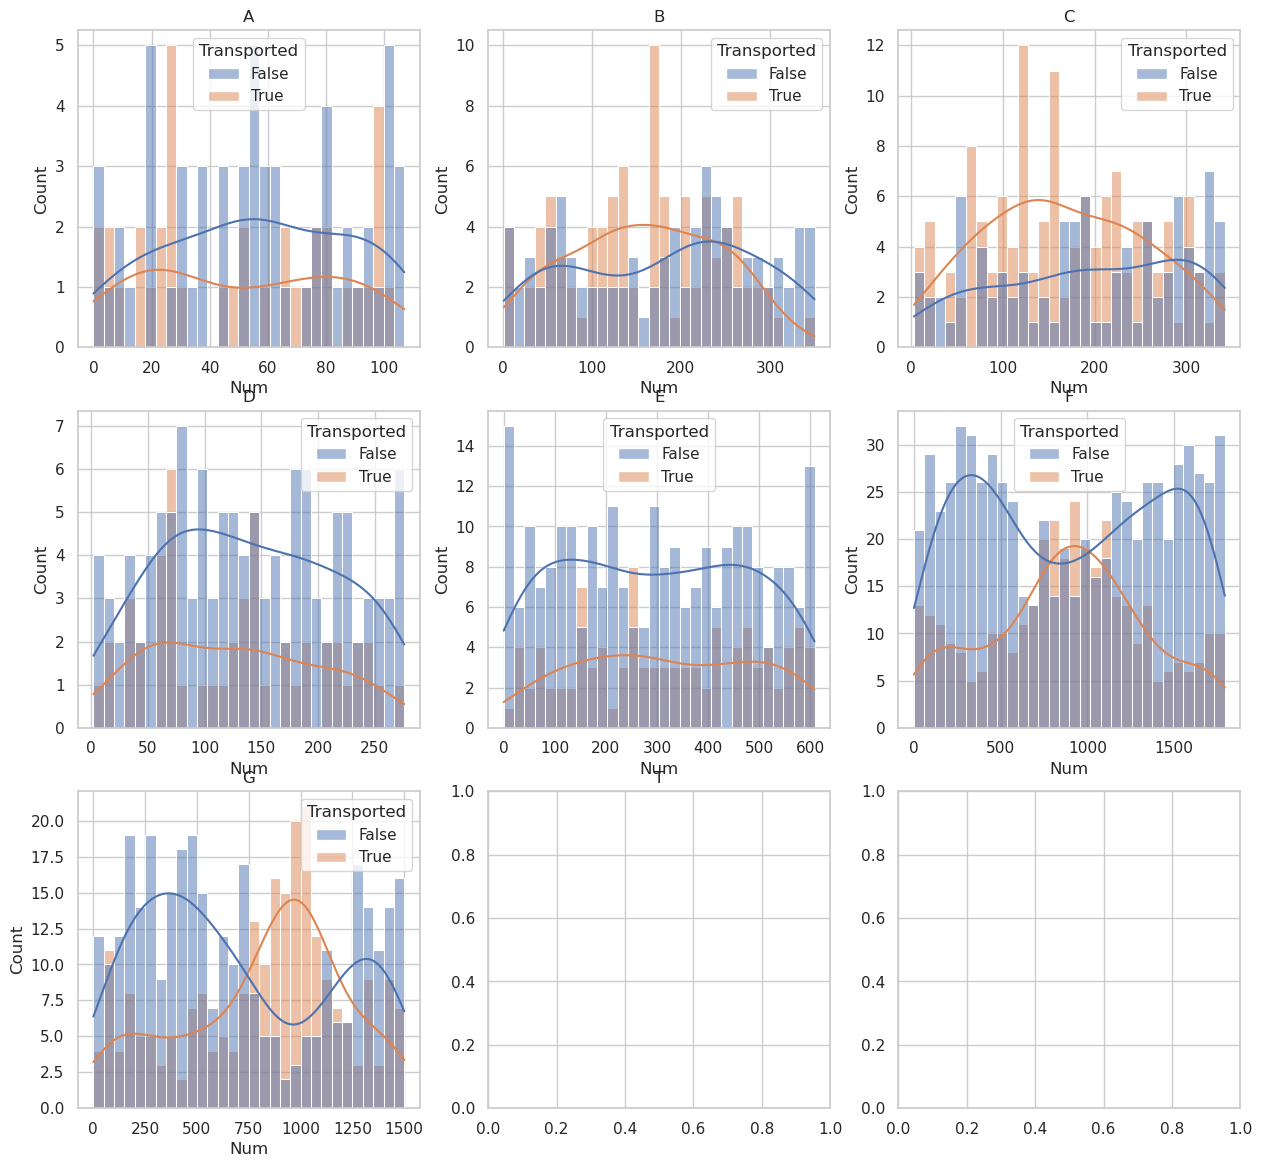

In [12]:
from math import ceil

values = df_cabins['Deck'].dropna().unique()
values.sort()
size = values.shape[0]

fig, axs = plt.subplots(3, ceil(size / 3), figsize=(15, ceil(5 * size / 3)))
axs = axs.flatten()

for ax, v in zip(axs, values):
    sns.histplot(df_cabins[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep'] == False) & (df_cabins['Side'] == 'S')], x='Num', hue='Transported', kde=True,
                 bins=30, ax=ax)
    ax.set_title(v)

plt.show()

In [13]:
from sklearn.svm import SVC

values = df_cabins['Deck'].dropna().unique()
values.sort()

svcs = []

for i, v in enumerate(values):
    fs = (df_cabins['Deck'] == v) & df_cabins['CryoSleep'] & (df_cabins['Side'] == 'S')
    fp = (df_cabins['Deck'] == v) & df_cabins['CryoSleep'] & (df_cabins['Side'] == 'P')
    Xs = df_cabins[fs]['Num'].to_numpy().reshape(-1, 1)
    Xp = df_cabins[fp]['Num'].to_numpy().reshape(-1, 1)
    ys = y[fs]
    yp = y[fp]
    svcs.append((SVC(), SVC()))
    try:
        svcs[-1][0].fit(Xs, ys)
        print(f'{v}-S: {svcs[-1][0].score(Xs, ys)}')
        svcs[-1][1].fit(Xp, yp)
        print(f'{v}-P: {svcs[-1][1].score(Xp, yp)}')
    except ValueError:
        print(f'{v} Fixed')

A-S: 0.9230769230769231
A-P: 0.9655172413793104
B Fixed
C Fixed
D Fixed
E-S: 0.6774193548387096
E-P: 0.6133333333333333
F-S: 0.981549815498155
F-P: 0.989247311827957
G-S: 0.725111441307578
G-P: 0.5937961595273265
T Fixed


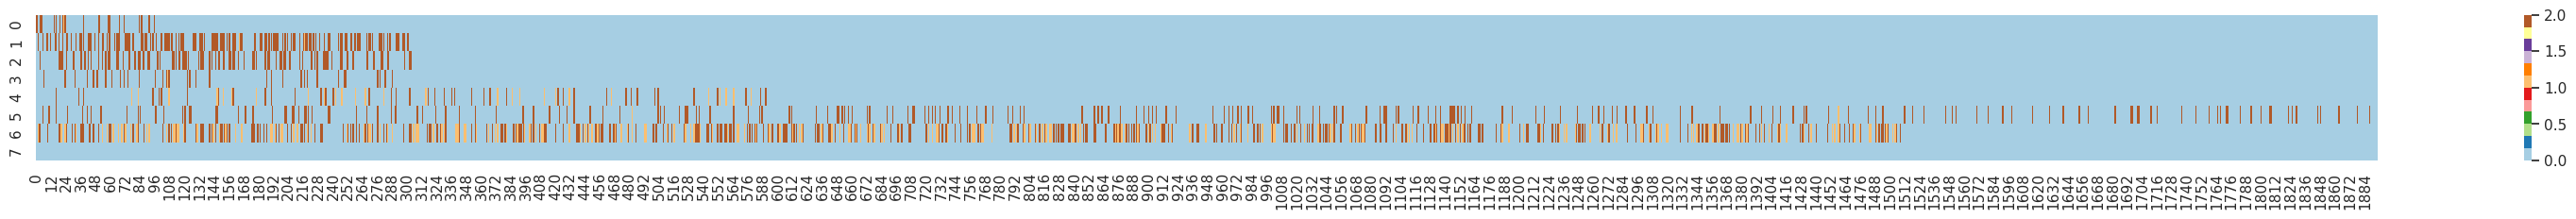

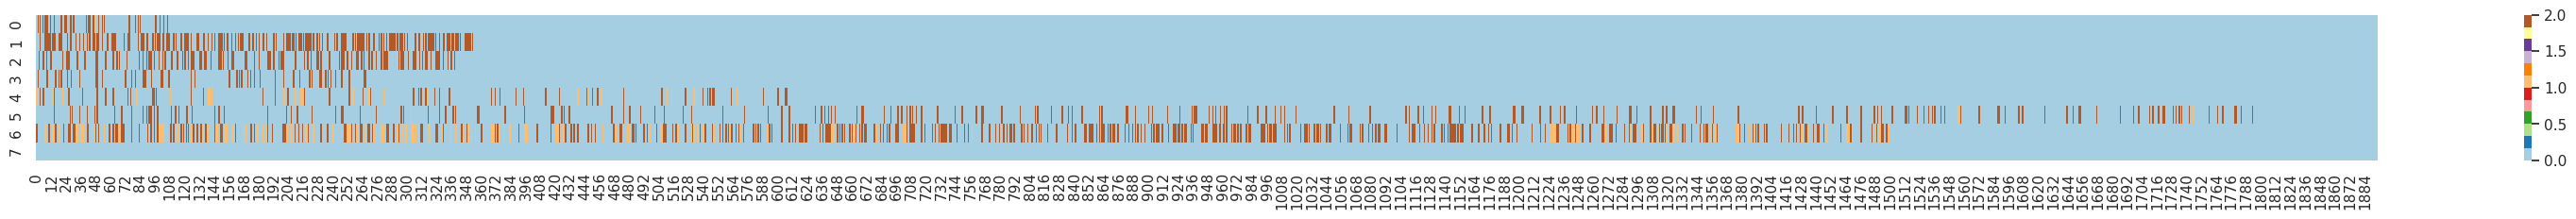

In [14]:
values = df_cabins['Deck'].dropna().unique()
values.sort()
width = ceil(df_cabins['Num'].max() + 1)

mat = np.zeros((values.shape[0], width), dtype=int)
for i, v in enumerate(values):
    decks = df_cabins.loc[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep']) & (df_cabins['Side'] == 'P')]
    for ii, d in decks.iterrows():
        mat[i][ceil(d['Num'])] = 2 if d['Transported'] else 1

fig, ax = plt.subplots(figsize=(40, 2))
sns.heatmap(mat, cmap='Paired', ax=ax)
fig.savefig('hm1.png')
plt.show()

mat = np.zeros((values.shape[0], width), dtype=int)
for i, v in enumerate(values):
    decks = df_cabins.loc[(df_cabins['Deck'] == v) & (df_cabins['CryoSleep']) & (df_cabins['Side'] == 'S')]
    for ii, d in decks.iterrows():
        mat[i][ceil(d['Num'])] = 2 if d['Transported'] else 1

fig, ax = plt.subplots(figsize=(40, 2))
sns.heatmap(mat, cmap='Paired', ax=ax)
fig.savefig('hm2.png')
plt.show()

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

X_encoded = df_cabins

encoder = LabelEncoder()
X_encoded[0] = encoder.fit_transform(X_encoded[0].fillna('0'))
X_encoded[1] = X_encoded[1].fillna(0)
X_encoded[2] = encoder.fit_transform(X_encoded[2].fillna('0'))

svc = SVC()
svc.fit(X_encoded, y)
svc.score(X_encoded, y)

KeyError: 0

In [ ]:
df['Cabin'].value_counts()

## Missing Values

In [ ]:
df.isna().sum()

In [ ]:
dff = df.copy()
for c in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    dff[[c]] = df[[c]].fillna(df[c].mode()[0])
dff[['Cabin']] = df[['Cabin']].fillna('')
dff[['Age']] = df[['Age']].fillna(df['Age'].median())
dff.isna().sum()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder

df_encoded = OrdinalEncoder().fit_transform(df_X)
df_encoded[np.isnan(df_encoded)] = 0

pca = PCA(12)
res = pca.fit_transform(df_encoded)

fig, axs = plt.subplots(3, 4, figsize=(15, 15))
axs = axs.flatten()

for i in range(11):
    axs[i].scatter(res[:, i], res[:, i + 1])

plt.show()
pca.components_